In [1]:
from erddapy import ERDDAP

In [2]:
from erddapy import servers
{k: v.url for k, v in servers.items()}

{'cswc': 'https://coastwatch.pfeg.noaa.gov/erddap/',
 'apdrc': 'https://apdrc.soest.hawaii.edu/erddap/',
 'ncei': 'https://www.ncei.noaa.gov/erddap/',
 'bcodmo': 'https://erddap.bco-dmo.org/erddap/',
 'emodnet': 'https://erddap.emodnet-physics.eu/erddap/',
 'mii': 'https://erddap.marine.ie/erddap/',
 'cscgom': 'https://cwcgom.aoml.noaa.gov/erddap/',
 'ioos-sensors': 'https://erddap.sensors.ioos.us/erddap/',
 'cencoos': 'https://erddap.axiomdatascience.com/erddap/',
 'cencoos erddap': 'http://erddap.cencoos.org/erddap/',
 'neracoos': 'http://www.neracoos.org/erddap/',
 'ngdac': 'https://gliders.ioos.us/erddap/',
 'pacioos': 'https://pae-paha.pacioos.hawaii.edu/erddap/',
 'sccoos': 'https://sccoos.org/erddap/',
 'secoora': 'http://erddap.secoora.org/erddap/',
 'osmc': 'http://osmc.noaa.gov/erddap/',
 'onc': 'http://dap.onc.uvic.ca/erddap/',
 'pifsc': 'https://oceanwatch.pifsc.noaa.gov/erddap/',
 'ooi': 'https://erddap.dataexplorer.oceanobservatories.org/erddap/',
 'ooi goldcopy': 'https:

In [3]:
e = ERDDAP(server="caricoos")
e.server

'caricoos'

In [4]:
e = ERDDAP(
    server="http://dm3.caricoos.org:8002/erddap/",  # "NOAA IOOS NGDAC (National Glider Data Assembly Center)"
    protocol="tabledap",
    response="csv",
)

In [5]:
import pandas as pd

url = e.get_search_url(search_for="PR1", response="csv")
dataset_id = pd.read_csv(url)['Dataset ID'][0]

In [6]:
e.dataset_id = dataset_id

#data_url = e.get_download_url(dataset_id=dataset_id, response="csv").to_pandas()
df = e.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
    ).dropna()

In [7]:
df.describe()

,longitude (degrees_east),latitude (degrees_north),depth (m),offset_time (seconds),current_u (cm/s),current_u_qc (1),current_v (cm/s),current_v_qc (1),current_speed (cm/s),current_speed_qc (1),current_direction (cm/s),current_direction_qc (1)
count,3.042252e+06,3.042252e+06,3.042252e+06,3.042252e+06,3.042252e+06,3.042252e+06,3.042252e+06,3.042252e+06,3.042252e+06,3.042252e+06,3.042252e+06,3.042252e+06
mean,-6.652412e+01,1.786035e+01,2.048611e+01,5.953708e+00,-5.275990e+00,2.176957e+00,-1.458683e+00,2.176957e+00,1.048499e+01,2.176957e+00,2.205981e+02,2.176957e+00
std,1.507665e-03,1.579651e-03,1.041199e+01,3.118211e+01,1.105812e+01,5.475777e+00,5.707801e+00,5.475777e+00,8.653896e+00,5.475777e+00,7.905485e+01,5.475777e+00
min,-6.653204e+01,1.786005e+01,2.500000e+00,-4.530000e+02,-1.308849e+02,0.000000e+00,-1.856428e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-6.652383e+01,1.786005e+01,1.175000e+01,1.000000e+00,-1.081615e+01,0.000000e+00,-4.115711e+00,0.000000e+00,4.600000e+00,0.000000e+00,1.653000e+02,0.000000e+00
50%,-6.652383e+01,1.786005e+01,2.050000e+01,2.000000e+00,-4.439223e+00,3.000000e+00,-1.133284e+00,3.000000e+00,8.100000e+00,3.000000e+00,2.491000e+02,3.000000e+00
75%,-6.652383e+01,1.786005e+01,2.925000e+01,2.000000e+00,5.819232e-01,3.000000e+00,1.621987e+00,3.000000e+00,1.380000e+01,3.000000e+00,2.759000e+02,3.000000e+00
max,-6.652383e+01,1.786866e+01,3.800000e+01,1.176000e+03,1.299491e+02,9.900000e+01,8.947399e+01,9.900000e+01,2.069000e+02,9.900000e+01,3.599000e+02,9.900000e+01


array([<AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>,
       <AxesSubplot:xlabel='time (UTC)'>], dtype=object)

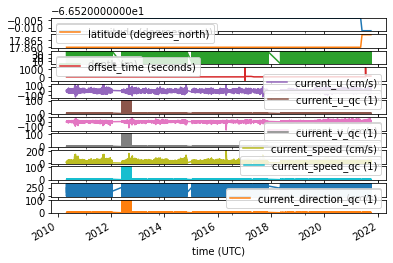

In [8]:
df.plot(subplots=True)